In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train_ann = x_train.reshape(-1, 28*28) / 255.0
x_test_ann = x_test.reshape(-1, 28*28) / 255.0
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_history = ann_model.fit(x_train_ann, y_train_cat, epochs=10, validation_split=0.2, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9214 - loss: 0.2718 - val_accuracy: 0.9541 - val_loss: 0.1480
Epoch 2/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9667 - loss: 0.1115 - val_accuracy: 0.9668 - val_loss: 0.1055
Epoch 3/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9766 - loss: 0.0772 - val_accuracy: 0.9681 - val_loss: 0.1066
Epoch 4/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9820 - loss: 0.0578 - val_accuracy: 0.9718 - val_loss: 0.0930
Epoch 5/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9851 - loss: 0.0451 - val_accuracy: 0.9743 - val_loss: 0.0924
Epoch 6/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9880 - loss: 0.0365 - val_accuracy: 0.9718 - val_loss: 0.0989
Epoch 7/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9904 - loss: 0.0289 - val_accuracy: 0.9746 - val_loss: 0.0936
Epoch 8/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9714 - val_loss: 0.1143
Epoch 9/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9922 - loss: 0.0216 - val_accuracy: 0.972

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train_cnn, y_train_cat, epochs=10, validation_split=0.2, verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 - 48s - 32ms/step - accuracy: 0.9498 - loss: 0.1630 - val_accuracy: 0.9828 - val_loss: 0.0571
Epoch 2/10
1500/1500 - 46s - 31ms/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9843 - val_loss: 0.0536
Epoch 3/10
1500/1500 - 80s - 54ms/step - accuracy: 0.9891 - loss: 0.0354 - val_accuracy: 0.9864 - val_loss: 0.0435
Epoch 4/10
1500/1500 - 42s - 28ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9876 - val_loss: 0.0377
Epoch 5/10
1500/1500 - 43s - 29ms/step - accuracy: 0.9931 - loss: 0.0202 - val_accuracy: 0.9852 - val_loss: 0.0538
Epoch 6/10
1500/1500 - 45s - 30ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9908 - val_loss: 0.0374
Epoch 7/10
1500/1500 - 79s - 53ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9900 - val_loss: 0.0424
Epoch 8/10
1500/1500 - 83s - 55ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9879 - val_loss: 0.0458
Epoch 9/10
1500/1500 - 83s - 56ms/step - accuracy: 0.9976 - loss: 0.0072 - val_a

In [ ]:
ann_eval = ann_model.evaluate(x_test_ann, y_test_cat)
cnn_eval = cnn_model.evaluate(x_test_cnn, y_test_cat)

print("\nANN Test Accuracy:", ann_eval[1])
print("CNN Test Accuracy:", cnn_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.1172
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9864 - loss: 0.0497

ANN Test Accuracy: 0.9775999784469604
CNN Test Accuracy: 0.9897000193595886


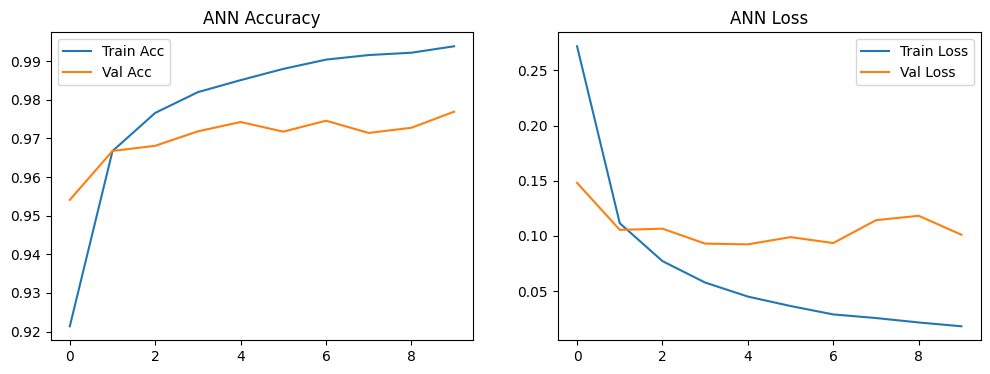

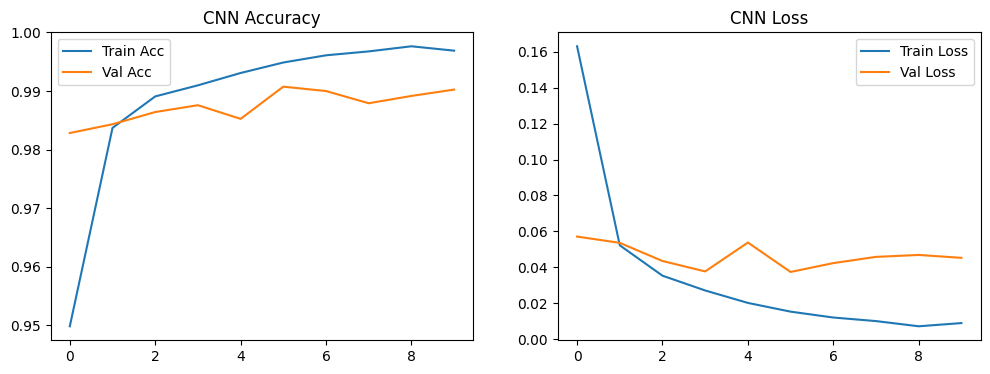

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(ann_history, "ANN")
plot_history(cnn_history, "CNN")

In [ ]:
ann_preds = np.argmax(ann_model.predict(x_test_ann), axis=1)
cnn_preds = np.argmax(cnn_model.predict(x_test_cnn), axis=1)

print("\nANN Classification Report")
print(classification_report(y_test, ann_preds))
print("\nCNN Classification Report")
print(classification_report(y_test, cnn_preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

ANN Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


CNN Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       

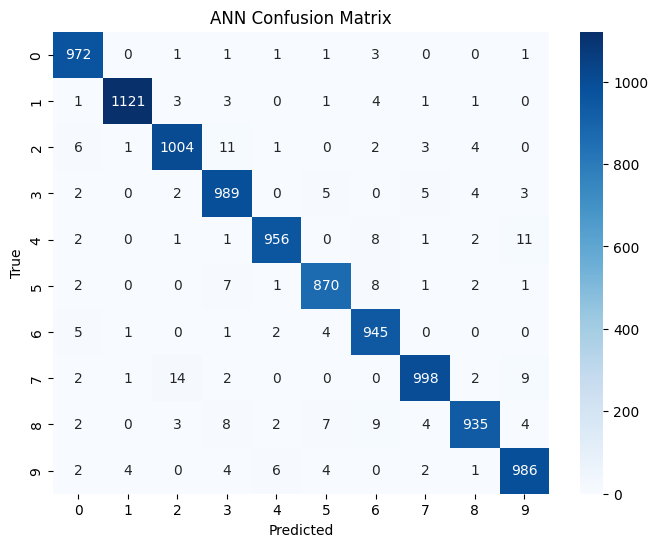

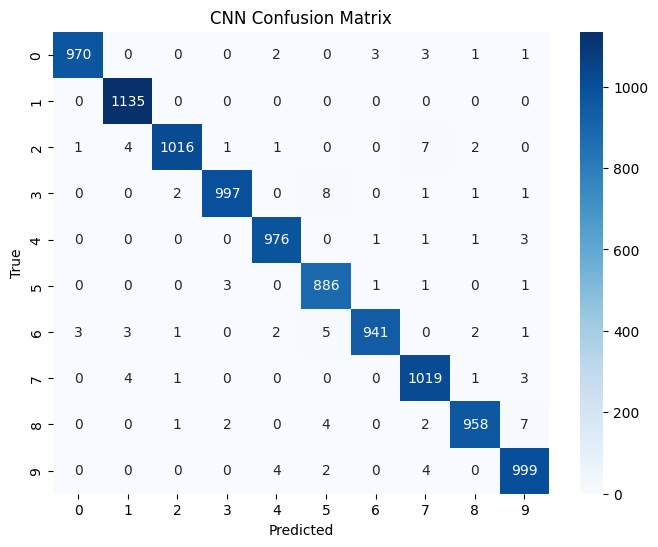

In [ ]:
def plot_conf_matrix(true, pred, title):
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_conf_matrix(y_test, ann_preds, "ANN Confusion Matrix")
plot_conf_matrix(y_test, cnn_preds, "CNN Confusion Matrix")